In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
df_seq = pd.read_csv("seq_results_laptop.tsv", sep="\t")
df_par = pd.read_csv("par_results_laptop.tsv", sep="\t")

df_seq["type"] = "sequential"
df_par["type"] = "parallel"

df = pd.concat([df_seq, df_par])

def convert_time(exec_time):
    minutes = float(exec_time.split("m")[0])
    seconds = float(exec_time.split("m")[1].split("s")[0])
    return minutes * 60 + seconds

def scheduling_type(scheduling):
    if str(scheduling) == 'nan':
        return None
    return scheduling.split(",")[0]

def chunk_size(scheduling):
    if str(scheduling) == 'nan':
        return None
    try: 
        return int(scheduling.split(",")[1])
    except IndexError:
        return 'Default'

df["time"] = df["time"].apply(convert_time)

df["scheduling_type"] = df["scheduling"].apply(scheduling_type)
df["scheduling_chunk_size"] = df["scheduling"].apply(chunk_size)

def calculate_absolute_speedup(df):
    sequential_time = df[df["type"]=="sequential"]["time"].mean()
    df["absolute_speedup"] = np.nan
    df.loc[df["type"] == "parallel", 'absolute_speedup'] = sequential_time / df[df["type"] == "parallel"]["time"]
    return df

df = df.groupby(['tab_size'], as_index=False).apply(calculate_absolute_speedup)

df = df.groupby(['type', 'tab_size', 'scheduling_type', 'threads', 'scheduling_chunk_size'], as_index=False).agg({'time':['mean','std'], 'absolute_speedup':['mean','std']})

# tmp = df.groupby(['type', 'problem_size', 'instance_type'], as_index=False)

df


type   tab_size scheduling_type threads scheduling_chunk_size    time  \
                                                                         mean   
0   parallel          2          guided       1                  16.0  0.0010   
1   parallel          2          guided       4                  16.0  0.0011   
2   parallel          2          guided       6                  16.0  0.0014   
3   parallel          2          guided       8                  16.0  0.0020   
4   parallel          2          guided      12                  16.0  0.0027   
5   parallel          2          guided      24                  16.0  0.0038   
6   parallel         20          guided       1                  16.0  0.0011   
7   parallel         20          guided       4                  16.0  0.0012   
8   parallel         20          guided       6                  16.0  0.0013   
9   parallel         20          guided       8                  16.0  0.0022   
10  parallel         20          guided      12                  16.0  0.0036   
11  parallel         20          guided      24                  16.0  0.0041   
12  parallel        200          guided       1                  16.0  0.0011   
13  parallel        200          guided       4                  16.0  0.0015   
14  parallel        200          guided       6                  16.0  0.0018   
15  parallel        200          guided       8                  16.0  0.0020   
16  parallel        200          guided      12                  16.0  0.0096   
17  parallel        200          guided      24                  16.0  0.0054   
18  parallel       2000          guided       1                  16.0  0.0012   
19  parallel       2000          guided       4                  16.0  0.0013   
20  parallel       2000          guided       6                  16.0  0.0020   
21  parallel       2000          guided       8                  16.0  0.0025   
22  parallel       2000          guided      12                  16.0  0.0118   
23  parallel       2000          guided      24                  16.0  0.0075   
24  parallel      20000          guided       1                  16.0  0.0015   
25  parallel      20000          guided       4                  16.0  0.0021   
26  parallel      20000          guided       6                  16.0  0.0027   
27  parallel      20000          guided       8                  16.0  0.0113   
28  parallel      20000          guided      12                  16.0  0.0078   
29  parallel      20000          guided      24                  16.0  0.0040   
30  parallel     200000          guided       1                  16.0  0.0042   
31  parallel     200000          guided       4                  16.0  0.0032   
32  parallel     200000          guided       6                  16.0  0.0032   
33  parallel     200000          guided       8                  16.0  0.0032   
34  parallel     200000          guided      12                  16.0  0.0067   
35  parallel     200000          guided      24                  16.0  0.0044   
36  parallel    2000000          guided       1                  16.0  0.0254   
37  parallel    2000000          guided       4                  16.0  0.0147   
38  parallel    2000000          guided       6                  16.0  0.0145   
39  parallel    2000000          guided       8                  16.0  0.0093   
40  parallel    2000000          guided      12                  16.0  0.0098   
41  parallel    2000000          guided      24                  16.0  0.0094   
42  parallel   20000000          guided       1                  16.0  0.2300   
43  parallel   20000000          guided       4                  16.0  0.0782   
44  parallel   20000000          guided       6                  16.0  0.0756   
45  parallel   20000000          guided       8                  16.0  0.0663   
46  parallel   20000000          guided      12                  16.0  0.0669   
47  parallel   20000000          guided

In [19]:
def add_to_plot(x, y, df, color, label, div = None):
    if div is None:
        df = df.sort_values(by=[x])
        plt.plot(df[x], df[y]["mean"], 'o--', color=color, label=label)
#         plt.errorbar(df[x], df[y]["mean"], df[y]["std"], linestyle='None', color=color, zorder=3, elinewidth=1, capsize=2)
    else:
        df = df.sort_values(by=[x])
        plt.plot(df[x], df[y]["mean"] / df[y].iloc[0]["mean"], 'o--', color=color, label=label)
#         plt.errorbar(df[x], df[y]["mean"], df[y]["std"] / df[y].iloc[0]["std"], linestyle='None', color=color, zorder=3, elinewidth=1, capsize=2)

In [20]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS)

<ipython-input-22-e8f849a18e3c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


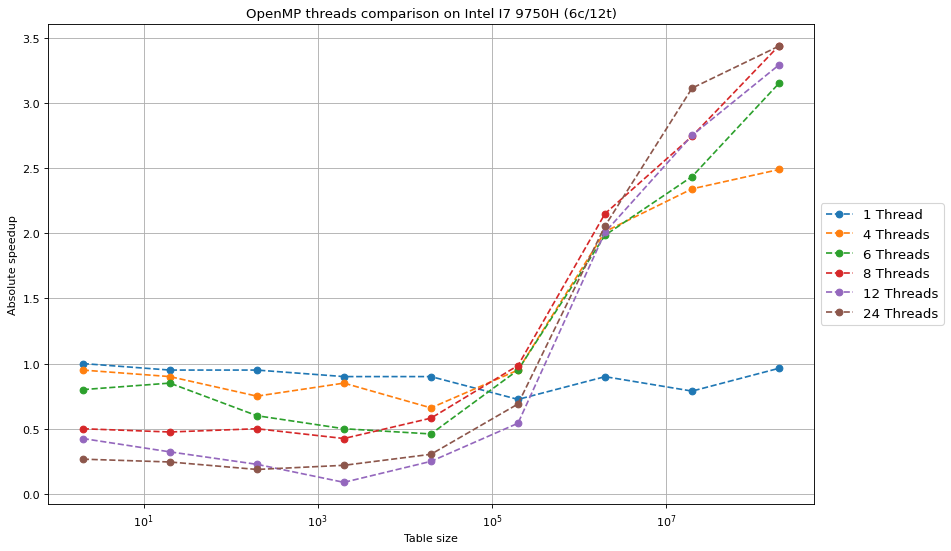

In [22]:
fig = plt.figure(figsize=(12, 7), dpi=80)
plt.title("OpenMP threads comparison on Intel I7 9750H (6c/12t)")
plt.xlabel("Table size")
plt.ylabel("Absolute speedup")

ax = fig.add_subplot(1, 1, 1)


add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 1)], colors[0], "1 Thread")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 4)], colors[1], "4 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 6)], colors[2], "6 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 8)], colors[3], "8 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 12)], colors[4], "12 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 24)], colors[5], "24 Threads")

# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == None)], colors[5], "dynamic")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 1)], colors[6], "dynamic,1")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 4)], colors[7], "dynamic,4")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 64)], colors[8], "dynamic,64")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 4096)], colors[9], "dynamic,4096")

y_vals = df[(df['tab_size'] == df['tab_size'].max())]['time']['mean']


plt.yticks(y_vals[np.isnan(y_vals) == False])

ax.set_xscale('log')
ax.set_yscale('linear')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.tight_layout()
plt.grid()
plt.show()

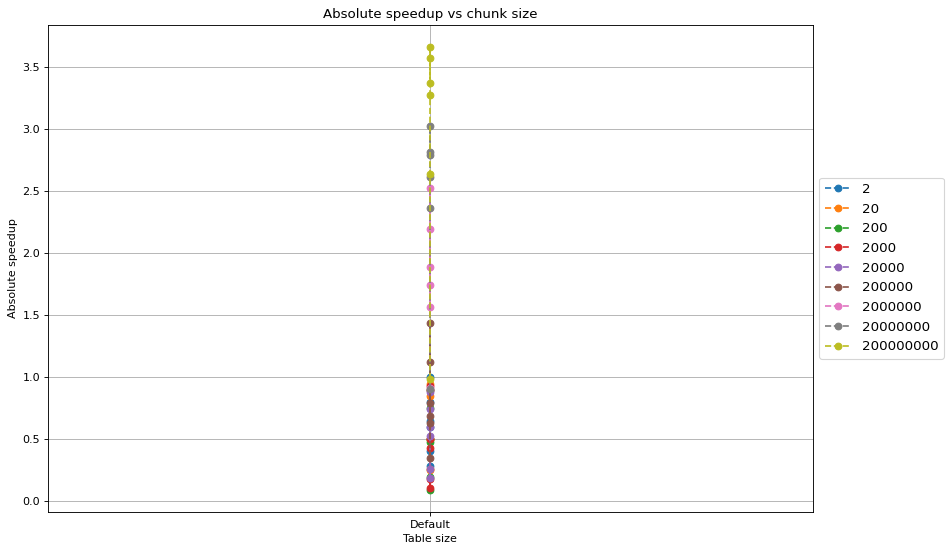

In [16]:
plt.figure(figsize=(12, 7), dpi=80)
plt.title("Absolute speedup vs chunk size" )
plt.xlabel("Table size")
plt.ylabel("Absolute speedup")

add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 2)], colors[0], "2")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 20)], colors[1], "20")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 200)], colors[2], "200")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 2000)], colors[3], "2000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 20000)], colors[4], "20000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 200000)], colors[5], "200000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 2000000)], colors[6], "2000000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 20000000)], colors[7], "20000000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 200000000)], colors[8], "200000000")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.tight_layout()
plt.grid()
plt.show()